In [1]:
import pandas as pd
import numpy as np

### Intro
Pandas is a powerful library for working with time series and tabular data. We will just scratch the surface here. 
There are great tutorials on their website, such as [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html). 

Another reference https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html

The purpose of introducing it here is that many of the internal data structures we use are from pandas, and many of our functions either take pandas objects as input
or return them as output. It will be useful to have a working understanding of the operations available, especially when working with return values that are very large
pandas data frames.

Some quick examples which we will encounter shortly.
Suppose we have a powersimdata grid object, called `grid`. Some attributes of this which are data frames include `grid.plant`, `grid.bus`, and `grid.branch`
Also, suppose we have a scenario which has been completed, and we access the results, e.g. `scenario.get_lmp()`. This will also return a data frame. While many features involving data frame manipulation are abstracted by taking a `scenario` as input and performing high level functionality, it can be useful to inspect the underlying data, as with any programming environment. 

In [5]:
from IPython.display import IFrame
IFrame('https://xkcd.com/353', width=800, height=450)

In [2]:
!touch example.csv && rm example.csv
!echo "column1,column2" >> example.csv
!echo "foo,2" >> example.csv
!echo "bar,3" >> example.csv
!echo "baz,4" >> example.csv
!echo "baz,5" >> example.csv

In [3]:
df = pd.read_csv("example.csv")

In [4]:
df

,column1,column2
0,foo,2
1,bar,3
2,baz,4
3,baz,5


**Note** - both index and columns are an "index" type

In [5]:
df.columns

Index(['column1', 'column2'], dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
df.shape

(4, 2)

In [8]:
df["column1"]

0    foo
1    bar
2    baz
3    baz
Name: column1, dtype: object

In [9]:
df[2:3]

,column1,column2
2,baz,4


In [10]:
# select by row and column labels
df.loc[3, "column2"]

5

In [11]:
# integer based selection
df.iloc[1,:]

column1    bar
column2      3
Name: 1, dtype: object

In [12]:
import math
x = [i/10 for i in range(20)]
fx = [math.sqrt(i) for i in x]
fx

[0.0,
 0.31622776601683794,
 0.4472135954999579,
 0.5477225575051661,
 0.6324555320336759,
 0.7071067811865476,
 0.7745966692414834,
 0.8366600265340756,
 0.8944271909999159,
 0.9486832980505138,
 1.0,
 1.0488088481701516,
 1.0954451150103321,
 1.140175425099138,
 1.1832159566199232,
 1.224744871391589,
 1.2649110640673518,
 1.3038404810405297,
 1.3416407864998738,
 1.378404875209022]

In [13]:
s = pd.Series(fx, index=x)
s

0.0    0.000000
0.1    0.316228
0.2    0.447214
0.3    0.547723
0.4    0.632456
0.5    0.707107
0.6    0.774597
0.7    0.836660
0.8    0.894427
0.9    0.948683
1.0    1.000000
1.1    1.048809
1.2    1.095445
1.3    1.140175
1.4    1.183216
1.5    1.224745
1.6    1.264911
1.7    1.303840
1.8    1.341641
1.9    1.378405
dtype: float64

<AxesSubplot:>

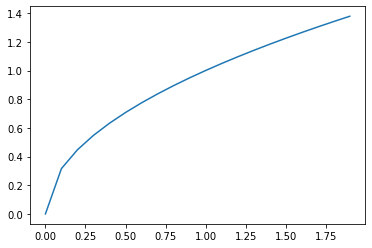

In [14]:
s.plot()

In [15]:
df2 = pd.DataFrame(
     {
         "A": 1.0,
         "B": pd.Timestamp("20130102"),
         "C": pd.Series(1, index=list(range(4)), dtype="float32"),
         "D": np.array([3] * 4, dtype="int32"),
         "E": pd.Categorical(["test", "train", "test", "train"]),
         "F": "foo",
     }
 )
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [16]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

<AxesSubplot:>

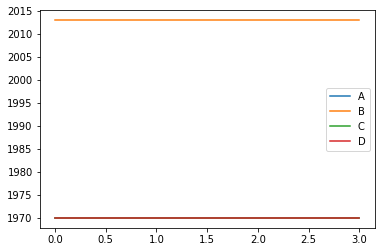

In [17]:
df2.plot()

In [18]:
df2.groupby("E").sum("D")

,A,C,D
E,,,
test,2.0,2.0,6
train,2.0,2.0,6


In [19]:
pd.date_range("2016-01-01", "2016-12-31", freq="M")

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

The handbook referenced earlier also has a good section on working with time series in python, numpy and pandas [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)

In [23]:
df2.set_index("B", inplace=True)

In [24]:
df2

,A,C,D,E,F
B,,,,,
2013-01-02,1.0,1.0,3,test,foo
2013-01-02,1.0,1.0,3,train,foo
2013-01-02,1.0,1.0,3,test,foo
2013-01-02,1.0,1.0,3,train,foo


<AxesSubplot:xlabel='B'>

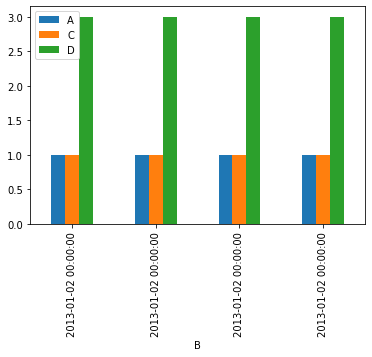

In [28]:
df2.plot(kind="bar")